# Simple Linear Regression Model

### Objectives
- Import necessary libraries.
- Generate a simple linear regression dataset with one training variable $x$ and one target variable $y$.
- Save the dataset to CSV, read it using pandas, and visualize it.
- Split the dataset into training and testing and visualize them.
- Visualize the Mean Absolute Error (MAE) cost function in 3D and 2D.
- Visualize the model using parameters that yield the lowest cost in 2D.
- Build and train the model using gradient descent.
- Visualize the learning curve and trained model on training and testing datasets.
- Compare predictions of the testing dataset and MAE, and parameters of the trained model and scikit-learn trained model.

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random data for the training variable (x)
x = np.random.uniform(low=0, high=10, size=100)

# Generate the target variable (y) with a linear relationship and some noise
y = 2 * x + 3 + np.random.normal(loc=0, scale=2, size=100)

In [3]:
# Create a DataFrame to store the dataset
df = pd.DataFrame({"x": x, "y": y})

# Save the dataset to a CSV file
df.to_csv("simple_linear_regression_dataset.csv", index=False)

# Read the dataset
data = pd.read_csv("simple_linear_regression_dataset.csv")
data

,x,y
0,3.745401,10.664897
1,9.507143,21.416271
2,7.319939,17.823400
3,5.986585,10.998032
4,1.560186,5.681029
...,...,...
95,4.937956,11.244291
96,5.227328,13.300453
97,4.275410,12.233124
98,0.254191,4.061764


Text(0, 0.5, 'y')

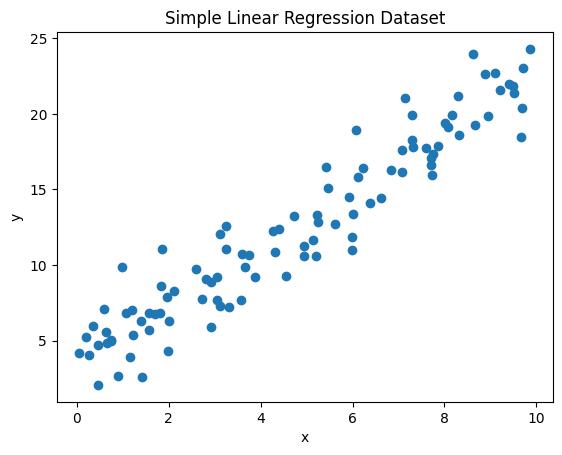

In [4]:
# Visualize the dataset
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set_title("Simple Linear Regression Dataset")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [5]:
# Split the dataset into training and testing, 70% for training and 30% for testing
x_train, y_train, x_test, y_test = x[:70], y[:70], x[70:], y[70:]

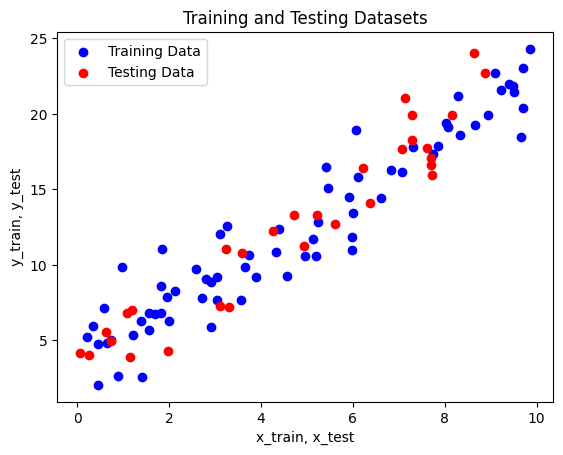

In [6]:
# Visualize the training and testing datasets
fig, ax = plt.subplots()

# Scatter plot for training dataset (blue)
ax.scatter(x_train, y_train, color="blue", label="Training Data")

# Scatter plot for testing dataset (red)
ax.scatter(x_test, y_test, color="red", label="Testing Data")

ax.set_title("Training and Testing Datasets")
ax.set_xlabel("x_train, x_test")
ax.set_ylabel("y_train, y_test")

plt.legend()

From the visualizations above, we can clearly conclude that the problem that we are trying to solve is **simple linear regression problem**, we will be using the simple linear regression model to fit the data points as perfectly as possible. The model can be represented by the following equation:

$$
\begin{equation}
\hat{\mathbf{y}} = w \times \mathbf{x} + b
\end{equation}
$$

where:
- $\hat{\mathbf{y}}$ represents the vector of predicted variables (dependent variables) for all training examples,
- $w$ represents the weight (slope) of the linear relationship,
- $\mathbf{x}$ represents the vector of input features (independent variables),
- $b$ represents the $y$-intercept.

Our goal is to find the optimal values of $w$ and $b$ that minimize the Mean Absolute Error (MAE) cost function. The MAE is defined as:

$$
\begin{equation}
\text{MAE} = \frac{1}{m} \sum_{i=1}^{m} |y_i - \hat{y_i} \tag{2}|
\end{equation}
$$

where:
- $m$ is the number of data points,
- $y_i$ is the actual target value for the $i$-th data point,
- $\hat{y_i}$ is the predicted value for the $i$-th data point.

To update our parameters, we will use the gradient descent optimization algorithm:

$$
\begin{equation}
w_{\text{new}} = w_{\text{old}} - \alpha \times \frac{\partial \text{MAE}}{\partial w} \tag{3}
\end{equation}
$$

$$
\begin{equation}
b_{\text{new}} = b_{\text{old}} - \alpha \times \frac{\partial \text{MAE}}{\partial b} \tag{4}
\end{equation}
$$

where:
- $(\alpha)$ is the learning rate, controlling the step size during parameter updates.

and,

$$
\begin{equation}
\frac{\partial \text{MAE}}{\partial w} = \frac{1}{m} \sum_{i=1}^{m}
\begin{cases}
    -x_i & \text{if } (y_i - \hat{y_i}) \geq 0 \\
    x_i & \text{if } (y_i - \hat{y_i})  < 0
\end{cases} \tag{5}
\end{equation}
$$

$$
\begin{equation}
\frac{\partial \text{MAE}}{\partial b} = \frac{1}{m} \sum_{i=1}^{m}
\begin{cases}
    -1 & \text{if } (y_i - \hat{y_i}) \geq 0 \\
    1 & \text{if } (y_i - \hat{y_i})  < 0
\end{cases} \tag{6}
\end{equation}
$$

Before we begin training our model, let's visualize the Mean Absolute Error (MAE) cost function across different ranges of parameters $w$ and $b$, both in 3D and 2D. This will provide us with a clearer understanding of the shape of our cost function and help us identify any local minima.

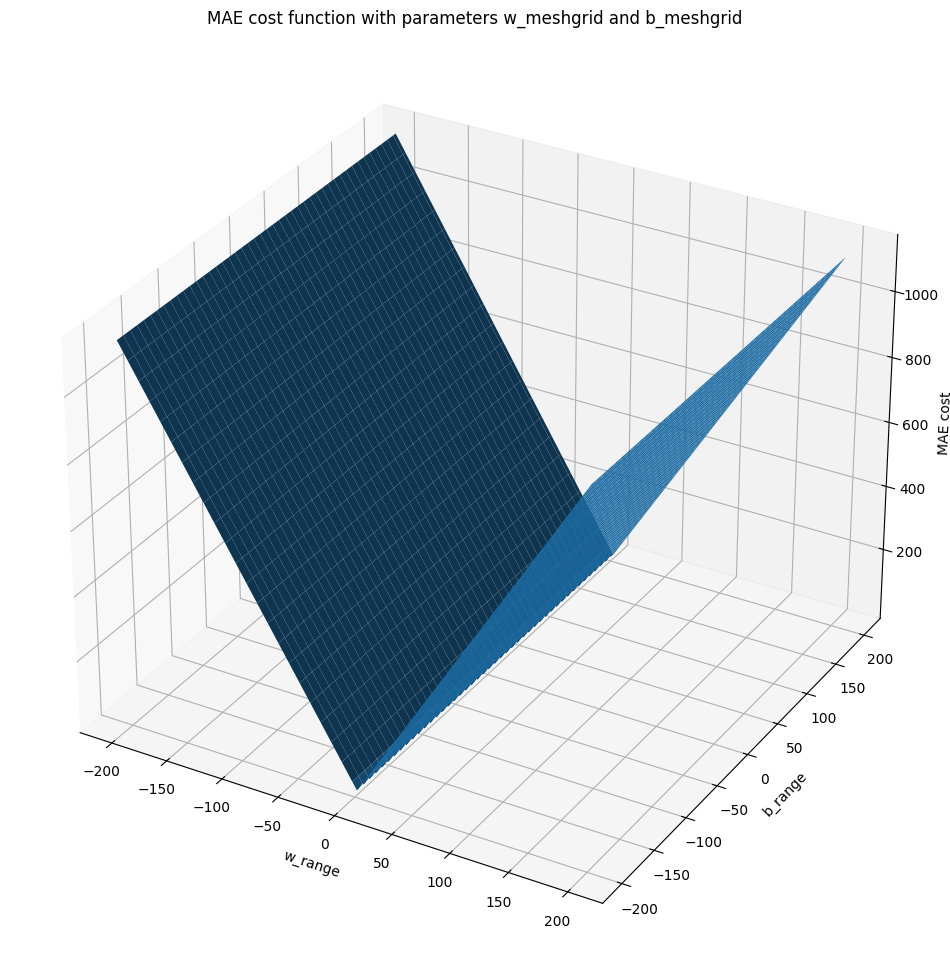

In [7]:
# Define the range of values for weight (w) and bias (b)
w_range, b_range = np.arange(-200, 201), np.arange(-200, 201)

# Create meshgrid of weight and bias values for 3D visualization
w_meshgrid, b_meshgrid = np.meshgrid(w_range, b_range)

# Calculate Mean Absolute Error (MAE) for each combination of weights and biases
mae_for_3d = np.expand_dims(
                np.sum(np.abs(y_train - (np.outer(w_range, x_train) + b_range[:, np.newaxis])), axis=1) / len(x_train),
                axis=0
            )

# Visualize the MAE cost function in 3D with parameters w_meshgrid and b_meshgrid
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 16))
ax.plot_surface(w_meshgrid, b_meshgrid, mae_for_3d)

ax.set_title("MAE cost function with parameters w_meshgrid and b_meshgrid")
ax.set_xlabel("w_range")
ax.set_ylabel("b_range")
ax.set_zlabel("MAE cost")

ax.zaxis.set_rotate_label(True)

Text(0, 0.5, 'MAE(b) cost')

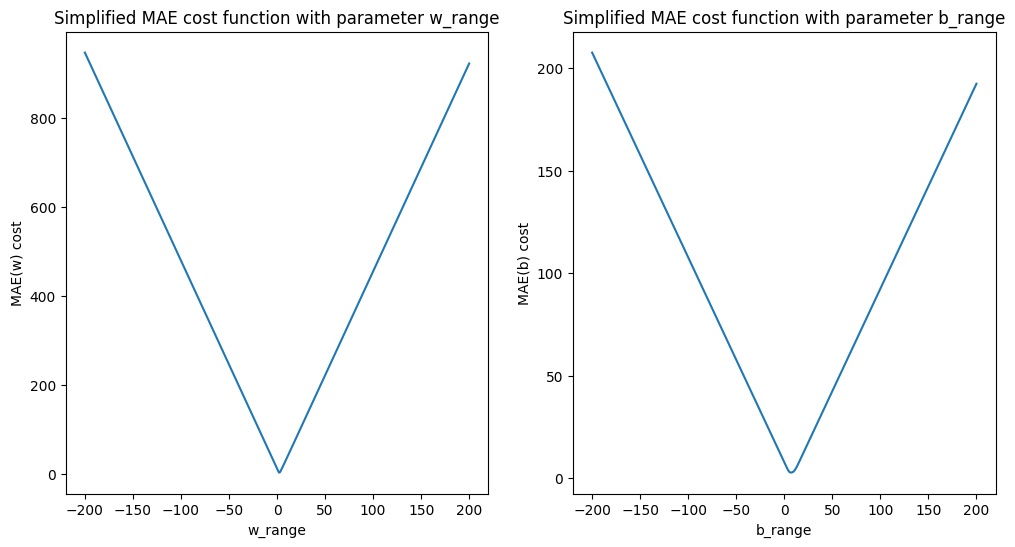

In [8]:
# Calculate Mean Absolute Error (MAE) for each combination of weights and biases along the weight dimension
mae_for_w = np.sum(np.abs(y_train - np.outer(w_range, x_train)), axis=1) / len(x_train)

# Calculate Mean Absolute Error (MAE) for each combination of weights and biases along the bias dimension
mae_for_b = np.sum(np.abs(y_train - (x_train + b_range[:, np.newaxis])), axis=1) / len(x_train)

# Visualize the simplified MAE cost function with parameters w_range and b_range
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Line plot for w_range and simplied MAE cost function
ax1.plot(w_range, mae_for_w)
ax1.set_title("Simplified MAE cost function with parameter w_range")
ax1.set_xlabel("w_range")
ax1.set_ylabel("MAE(w) cost")

# Line plot for b_range and simplied MAE cost function
ax2.plot(b_range, mae_for_b)
ax2.set_title("Simplified MAE cost function with parameter b_range")
ax2.set_xlabel("b_range")
ax2.set_ylabel("MAE(b) cost")

So by visualizing the Mean Absolute Error (MAE) cost function with only one parameter at a time, we can easily find the nearly optimal parameters $w$ and $b$. We will also use gradient descent, an optimization algorithm, to find the best optimal parameters for our model. But first, let's use the parameters that have been found using the simplified MAE approach.

In [9]:
# Find the index of the minimum cost
min_cost_index_w, min_cost_index_b = np.argmin(mae_for_w), np.argmin(mae_for_b)

# Retrieve the corresponding weight and bias value
weight, bias = w_range[min_cost_index_w], b_range[min_cost_index_b]

print(f"w = {weight}, b = {bias}")

w = 2, b = 7


In [10]:
def visualize_simple_lr_model(x, y, w, b):
    # Visualize the simple linear regression model on training dataset with the updated parameters w and b
    _, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(x, y, label="Training Data")
    ax.plot(x, ((w * x) + b), color="lightblue", label="Regression Model")
    ax.set_title("Simple Linear Regression Model")
    ax.set_xlabel("x_train")
    ax.set_ylabel("y_train")

    plt.legend()

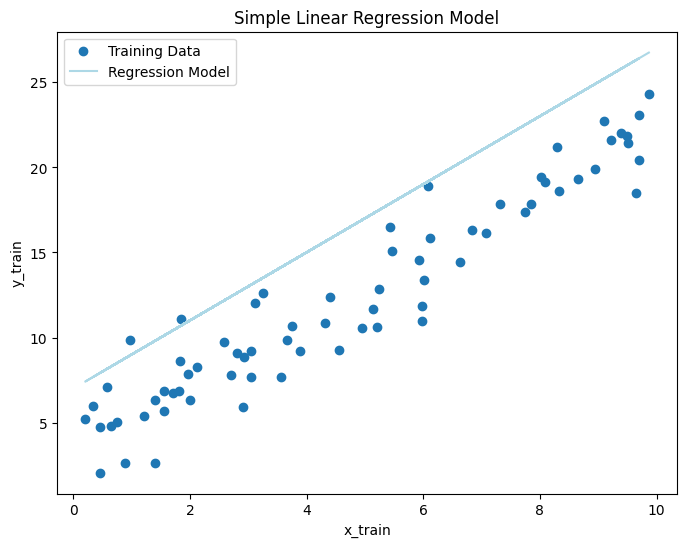

In [11]:
visualize_simple_lr_model(x_train, y_train, weight, bias)

Not bad! Without training our model, we're able to get closer to the right model by visualizing the simplified Mean Absolute Error (MAE) with different ranges for $w$ and $b$. Now, let's train our model using the gradient descent algorithm to fit the best line (model) to our training dataset.

In [12]:
def train_simple_lr_model(x, y, w=0, b=0, alpha=0.02, iterations=2000):

    learning_curve_data = []

    for i in range(iterations):
        y_hat = (w * x) + b
        cost = np.sum(np.abs(y - y_hat)) / len(x)
    
        print(f"Iteration = {i+1}, w = {w}, b = {b}, cost = {cost}")

        w = w - alpha * (np.sum(np.where((y - y_hat >= 0), -x, x)) / len(x))
        b = b - alpha * (np.sum(np.where((y - y_hat >= 0), -1, 1)) / len(x))

        if ((i+1) % 200) == 0:
            learning_curve_data.append([i+1, cost])


    return w, b, np.array(learning_curve_data)

In [13]:
w, b, learning_curve_data = train_simple_lr_model(x_train, y_train)

print(f"\noptimal (w) = {w}, optimal (b) = {b}")

Iteration = 1, w = 0, b = 0, cost = 12.269326334031609
Iteration = 2, w = 0.09349643627678074, b = 0.02, cost = 11.812247154208704
Iteration = 3, w = 0.18699287255356148, b = 0.04, cost = 11.355167974385797
Iteration = 4, w = 0.28048930883034223, b = 0.06, cost = 10.898088794562891
Iteration = 5, w = 0.37398574510712296, b = 0.08, cost = 10.441009614739988
Iteration = 6, w = 0.4674821813839037, b = 0.1, cost = 9.983930434917081
Iteration = 7, w = 0.5609786176606845, b = 0.12000000000000001, cost = 9.526851255094174
Iteration = 8, w = 0.6544750539374652, b = 0.14, cost = 9.069772075271269
Iteration = 9, w = 0.7479714902142459, b = 0.16, cost = 8.612692895448362
Iteration = 10, w = 0.8414679264910266, b = 0.18, cost = 8.155613715625456
Iteration = 11, w = 0.9349643627678074, b = 0.19999999999999998, cost = 7.69853453580255
Iteration = 12, w = 1.0284607990445882, b = 0.21999999999999997, cost = 7.241455355979643
Iteration = 13, w = 1.121957235321369, b = 0.23999999999999996, cost = 6.7843

Text(0, 0.5, 'cost')

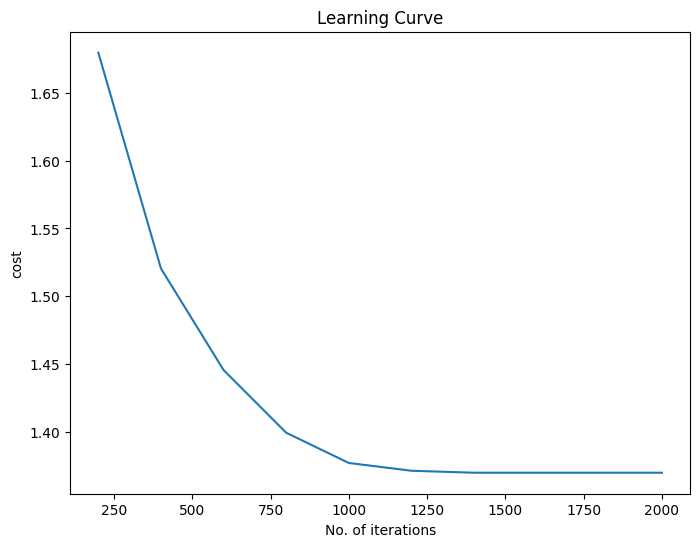

In [14]:
# Visualize the learning curve data
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(learning_curve_data[:,0], learning_curve_data[:,1])
ax.set_title("Learning Curve")
ax.set_xlabel("No. of iterations")
ax.set_ylabel("cost")

We can clearly see from the above plot that the cost is decreasing over time and eventually becomes completely flat after 1500 iterations, indicating the proper functioning of gradient descent and model convergence. Now, let's visualize our trained model on the training dataset and our model predictions on the testing dataset to see how well it generalizes to new data.

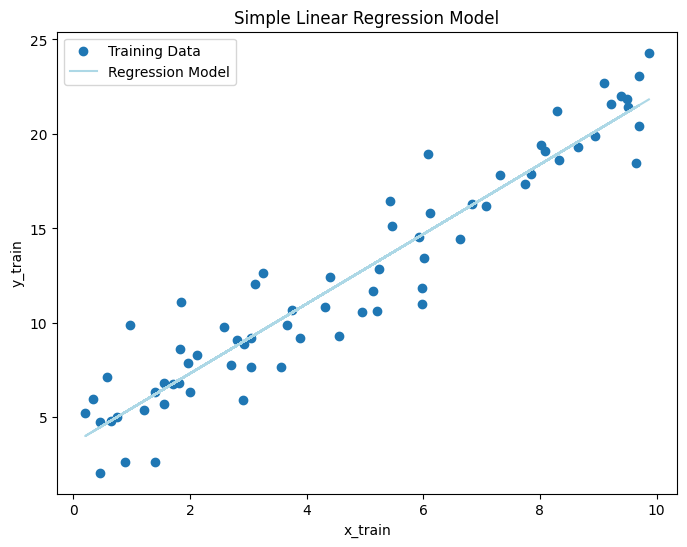

In [15]:
visualize_simple_lr_model(x_train, y_train, w, b)

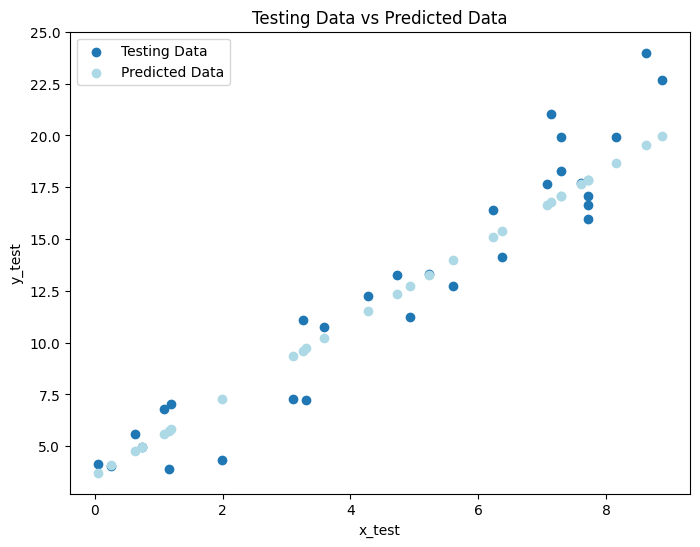

In [16]:
# Visualize the model's predictions on the testing dataset.
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(x_test, y_test, label="Testing Data")
ax.scatter(x_test, ((w * x_test) + b), color="lightblue", label="Predicted Data")
ax.set_title("Testing Data vs Predicted Data")
ax.set_xlabel("x_test")
ax.set_ylabel("y_test")

plt.legend()

Looking at the above plots, it might seem that the model hasn't generalized well to new data. However, it's important to remember that our dataset includes some "noise." Despite the presence of noise in the dataset, our simple linear regression model has performed quite well on this small and noisy dataset. Perhaps if we were to generate more data with the same linear relationship but without noise, our model would be even more accurate and visually appealing.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

# Make predictions on the test set
y_pred = model.predict(x_test.reshape(-1, 1))
print("y_pred:", y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test.reshape(-1, 1), y_pred)
print("\nMean Absolute Error:", mae)

# Retrieve the coefficient of the linear regression model
coefficient = model.coef_
print("\nCoefficient:", coefficient)

# Retrieve the intercept of the linear regression model
intercept = model.intercept_
print("\nIntercept:", intercept)

y_pred: [[17.92766492]
 [ 7.27930487]
 [ 3.69239937]
 [18.73004192]
 [16.71365701]
 [17.1248991 ]
 [17.90957342]
 [ 4.96461492]
 [10.24528524]
 [ 5.74114284]
 [19.61458143]
 [15.16226468]
 [ 9.73345273]
 [ 4.76992224]
 [ 9.36369018]
 [ 9.62735137]
 [17.13602056]
 [15.42700911]
 [20.06220421]
 [12.35719626]
 [ 5.81030608]
 [16.83224872]
 [17.71489937]
 [14.01076042]
 [17.90394471]
 [12.75787124]
 [13.29513096]
 [11.52776345]
 [ 4.06181485]
 [ 5.59302707]]

Mean Absolute Error: 1.44656095758246

Coefficient: [[1.85663819]]

Intercept: [3.58987364]


In [19]:
print("Sklearn_pred vs Our_pred")
np.hstack((y_pred, ((w * x_test) + b).reshape(-1, 1)))

Sklearn_pred vs Our_pred


array([[17.92766492, 17.86289652],
       [ 7.27930487,  7.28458832],
       [ 3.69239937,  3.72127983],
       [18.73004192, 18.65999496],
       [16.71365701, 16.65687515],
       [17.1248991 , 17.06541182],
       [17.90957342, 17.84492404],
       [ 4.96461492,  4.98512591],
       [10.24528524, 10.23105654],
       [ 5.74114284,  5.75654533],
       [19.61458143, 19.5387154 ],
       [15.16226468, 15.11568888],
       [ 9.73345273,  9.72259119],
       [ 4.76992224,  4.79171405],
       [ 9.36369018,  9.35526118],
       [ 9.62735137,  9.61718784],
       [17.13602056, 17.07646011],
       [15.42700911, 15.37869166],
       [20.06220421, 19.98339343],
       [12.35719626, 12.32907404],
       [ 5.81030608,  5.82525356],
       [16.83224872, 16.77468669],
       [17.71489937, 17.65153068],
       [14.01076042, 13.97175997],
       [17.90394471, 17.83933236],
       [12.75787124, 12.72711312],
       [13.29513096, 13.26083839],
       [11.52776345, 11.50509777],
       [ 4.06181485,

In [20]:
print("Sklearn_MAE vs Our_MAE")
np.hstack((mae, np.sum(np.abs(y_test - ((w * x_test) + b))) / len(x_test)))

Sklearn_MAE vs Our_MAE


array([1.44656096, 1.4576205 ])

In [21]:
print("Sklearn_Coefficient vs Our_Coefficient")
np.hstack((coefficient, np.array([[w]])))

Sklearn_Coefficient vs Our_Coefficient


array([[1.85663819, 1.84442401]])

In [22]:
print("Sklearn_Intercept vs Our_Intercept")
np.hstack((intercept, b))

Sklearn_Intercept vs Our_Intercept


array([3.58987364, 3.61942857])

By comparing predictions, Mean Absolute Error (MAE), and parameters of our model against the sklearn model, we can conclude that the goal of building a simple linear regression model that fits the data well has been achieved.